# DeepLabCut Toolbox
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species*, (under revision).

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to:
- create a project
- extract training frames
- label the frames
- plot the labeled images
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories

*Note*: Refine a network based after the network was trained on just a few labeled images is illustrated in "Demo-labeledexample-MouseReaching.ipynb". This demo also contains an already labeled data set and is perhaps the best starting point for brand new users.

## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

In [1]:
import deeplabcut

In [6]:
task='Both_eye_track' # Enter the name of your experiment Task
experimenter='Rylan' # Enter the name of the experimenter
video=[r"D:\2-photon data\ChAT-IRES-Cre; Ai162\190520-M385107-V1-2p\eyetracking\190520-M385107-spon-100-0.avi",
       r"D:\2-photon data\ChAT-IRES-Cre; Ai162\190520-M385107-V1-2p\eyetracking\190520-M385107-visual-100-0.avi",
       r"F:\2-photon Data\ChAT-IRES-Cre; Ai162\181001-M392929\Spontaneous\Eye Tracking\Eye 2\181001-M392929-spontaneous-110--1.avi",
      r"F:\2-photon Data\ChAT-IRES-Cre; Ai162\180926-M381204\Visual\Eye tracking\Eye 2\180926-M381204-visual-110--1.avi",
      r"F:\2-photon Data\ChAT-IRES-Cre; Ai162\180926-M381204\Spontaneous\Eye Tracking\Eye 1\180926-M381204-spontaneous-110--0.avi",
      r"F:\2-photon Data\Dbh-Cre_Ai162\180926-M387339\Auditory\Eye Tracking\Eye 2\180926-M387339-auditory-110--1.avi",
      r"F:\2-photon Data\ChAT-IRES-Cre; Ai162\181107-M392927\Airpuff\Eye Tracking\Eye 2\181107-M392927-airpuff-110--1.avi",
      r"D:\2-photon data\Slc6a4-Cre;Ai162\190514-M386185-2p\eyetracking\190514-M386185-visual-100-1.avi"] # Enter the paths of your videos you want to grab frames from.

path_config_file=deeplabcut.create_new_project(task,experimenter,video, working_directory=r'D:\Analysis\deeplabcuttest',copy_videos=True) #change the working directory to where you want the folders created.

# The function returns the path, where your project is. 
# You could also enter this manually (e.g. if the project is already created and you want to pick up, where you stopped...)
#path_config_file = '/home/Mackenzie/Reaching/config.yaml' # Enter the path of the config file that was just created from the above step (check the folder)

Created "D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos"
Created "D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\labeled-data"
Created "D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\training-datasets"
Created "D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\dlc-models"
Copying the videos
D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\190520-M385107-spon-100-0.avi
D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\190520-M385107-visual-100-0.avi
D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\181001-M392929-spontaneous-110--1.avi
D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\180926-M381204-visual-110--1.avi
D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\180926-M381204-spontaneous-110--0.avi
D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\180926-M387339-auditory-110--1.avi
D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-0

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) (algo=='uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\190520-M385107-spon-100-0.avi ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 918.5  seconds.
Extracting and downsampling... 27555  frames from the video.


27555it [00:20, 1317.31it/s]


Kmeans clustering ... (this might take a while)
Do you want to extract (perhaps additional) frames for video: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\190520-M385107-visual-100-0.avi ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 329.3  seconds.
Extracting and downsampling... 9879  frames from the video.


9879it [00:07, 1264.52it/s]


Kmeans clustering ... (this might take a while)
Do you want to extract (perhaps additional) frames for video: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\181001-M392929-spontaneous-110--1.avi ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 916.78  seconds.
Extracting and downsampling... 45839  frames from the video.


45839it [00:37, 1208.63it/s]


Kmeans clustering ... (this might take a while)
Do you want to extract (perhaps additional) frames for video: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\180926-M381204-visual-110--1.avi ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 321.48  seconds.
Extracting and downsampling... 16074  frames from the video.


16074it [00:13, 1180.82it/s]


Kmeans clustering ... (this might take a while)
Do you want to extract (perhaps additional) frames for video: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\180926-M381204-spontaneous-110--0.avi ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1118.36  seconds.
Extracting and downsampling... 55918  frames from the video.


55918it [00:43, 1299.34it/s]


Kmeans clustering ... (this might take a while)
Do you want to extract (perhaps additional) frames for video: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\180926-M387339-auditory-110--1.avi ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 322.22  seconds.
Extracting and downsampling... 16111  frames from the video.


16111it [00:13, 1189.77it/s]


Kmeans clustering ... (this might take a while)
Do you want to extract (perhaps additional) frames for video: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\181107-M392927-airpuff-110--1.avi ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 322.18  seconds.
Extracting and downsampling... 16109  frames from the video.


16109it [00:13, 1189.27it/s]


Kmeans clustering ... (this might take a while)
Do you want to extract (perhaps additional) frames for video: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\videos\190514-M386185-visual-100-1.avi ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 328.2  seconds.
Extracting and downsampling... 16410  frames from the video.


16410it [00:13, 1218.16it/s]


Kmeans clustering ... (this might take a while)

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).


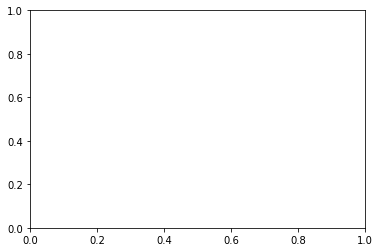

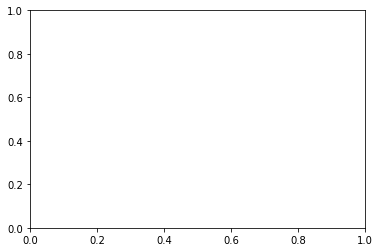

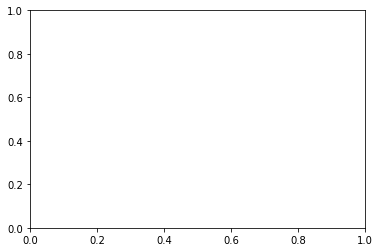

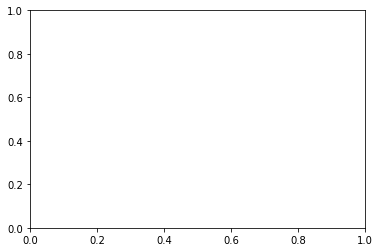

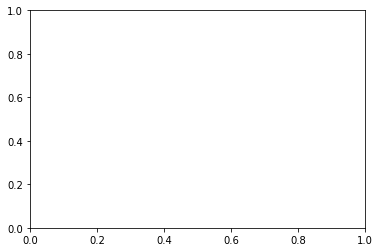

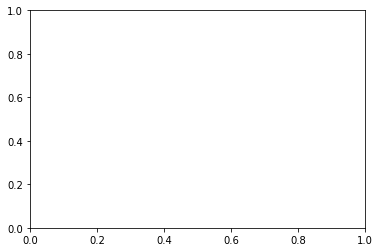

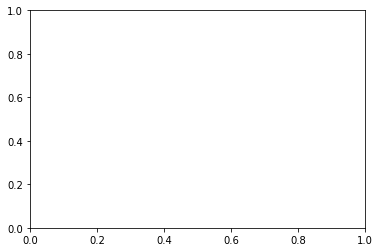

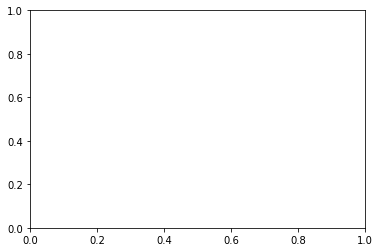

In [7]:
%matplotlib inline

deeplabcut.extract_frames(path_config_file,'automatic','kmeans',crop=True) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 

## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [8]:
%gui wx
deeplabcut.label_frames(path_config_file)

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [9]:
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by Rylan.
They are stored in the following folder: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\labeled-data\190520-M385107-spon-100-0_labeled.
They are stored in the following folder: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\labeled-data\190520-M385107-visual-100-0_labeled.
They are stored in the following folder: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\labeled-data\181001-M392929-spontaneous-110--1_labeled.
They are stored in the following folder: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\labeled-data\180926-M381204-visual-110--1_labeled.
They are stored in the following folder: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\labeled-data\180926-M381204-spontaneous-110--0_labeled.
They are stored in the following folder: D:\Analysis\deeplabcuttest\Both_eye_track-Rylan-2019-05-28\labeled-data\180926-M387339-auditory-110--1_labeled.
They are stored in the following folder: D:\Anal

If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [10]:
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Start training - If you want to use a CPU, continue. 
### If yu want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [ ]:
deeplabcut.train_network(path_config_file)

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [ ]:
deeplabcut.evaluate_network(path_config_file)

## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [ ]:
videofile_path = ['videos/video3.avi','videos/video4.avi'] #Enter the list of videos to analyze.
deeplabcut.analyze_videos(path_config_file,videofile_path)

## Extract outlier frames [optional step]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [ ]:
deeplabcut.extract_outlier_frames(path_config_file,['/videos/video3.avi'])

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [ ]:
%gui wx
deeplabcut.refine_labels(path_config_file)

In [ ]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [ ]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
%matplotlib notebook #for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,videofile_path)